In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Set the dataset directory path to the archive folder in your Google Drive
dataset_dir = '/content/drive/MyDrive/archive'

# List all files and subfolders in the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    print(f'Current directory: {root}')
    print(f'Subdirectories: {dirs}')
    print(f'Files: {files}')
    print('-' * 50)


Current directory: /content/drive/MyDrive/archive
Subdirectories: ['Train', 'Test', 'Meta']
Files: ['Meta.csv', 'Test.csv', 'Train.csv', '.DS_Store']
--------------------------------------------------
Current directory: /content/drive/MyDrive/archive/Train
Subdirectories: ['25', '14', '2', '15', '40', '5', '3', '13', '22', '12', '4', '39', '37', '41', '24', '36', '38', '31', '23', '30', '17', '42', '6', '10', '19', '21', '8', '28', '26', '1', '11', '9', '29', '7', '20', '0', '27', '18', '16', '33', '34', '32', '35']
Files: []
--------------------------------------------------
Current directory: /content/drive/MyDrive/archive/Train/25
Subdirectories: []
Files: ['00025_00021_00017.png', '00025_00019_00029.png', '00025_00005_00022.png', '00025_00006_00024.png', '00025_00029_00027.png', '00025_00026_00018.png', '00025_00024_00018.png', '00025_00030_00022.png', '00025_00002_00019.png', '00025_00011_00000.png', '00025_00008_00013.png', '00025_00028_00028.png', '00025_00020_00019.png', '00025

In [ ]:
import os

# List the contents of the dataset directory
dataset_dir = '/content/dataset'

for root, dirs, files in os.walk(dataset_dir):
    print(f'Directory: {root}')
    print(f'Contains: {len(files)} files')
    print('---')


Available folders in dataset:
['25', '14', '2', '15', '40', '5', '3', '13', '22', '12', '4', '39', '37', '41', '24', '36', '38', '31', '23', '30', '17', '42', '6', '10', '19', '21', '8', '28', '26', '1', '11', '9', '29', '7', '20', '0', '27', '18', '16', '33', '34', '32', '35']


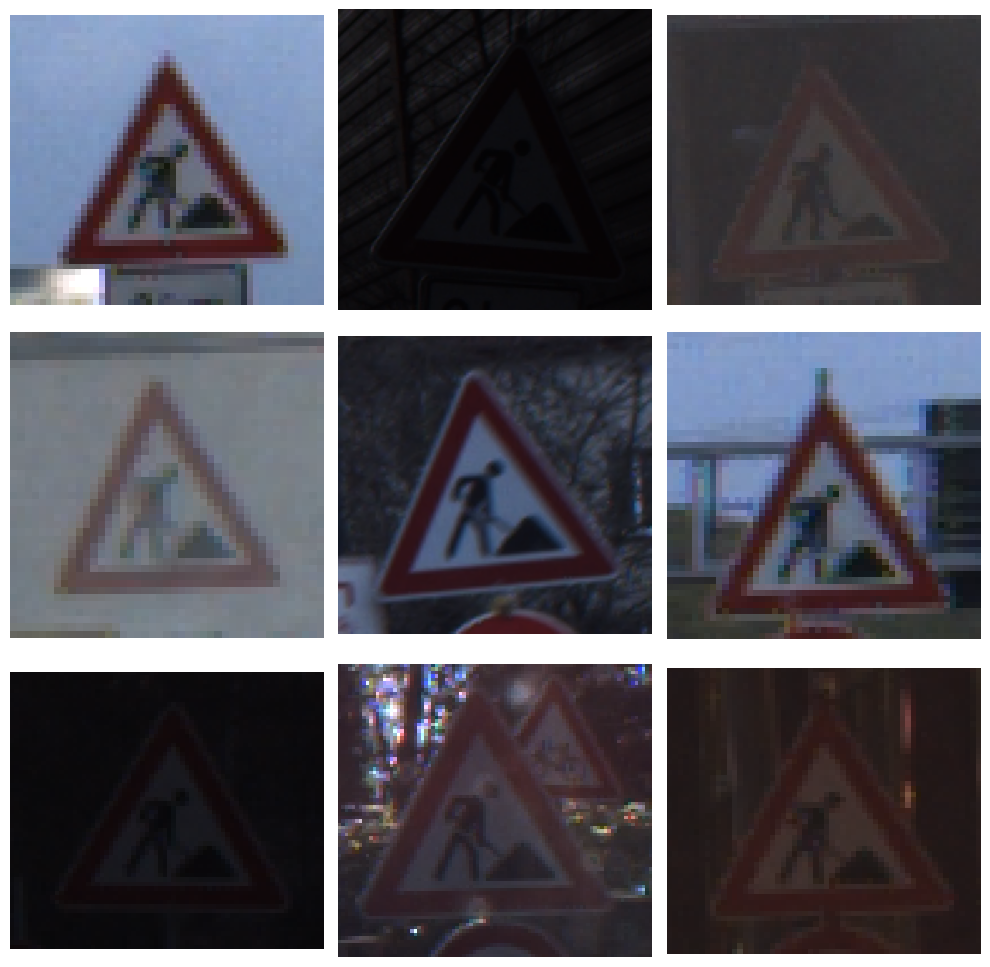

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Correct dataset directory path
dataset_dir = '/content/drive/MyDrive/archive'  # ✅ Update this path

# Function to display images
def display_images(image_paths):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, i + 1)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"⚠️ Could not load image: {img_path}")
    plt.tight_layout()
    plt.show()

# Check available class folders
print("Available folders in dataset:")
train_dir = os.path.join(dataset_dir, 'Train')  # ✅ This now becomes /content/drive/MyDrive/archive/Train

if os.path.exists(train_dir):
    class_folders = os.listdir(train_dir)
    print(class_folders)

    # Display images from the first class folder
    if class_folders:
        example_class_dir = os.path.join(train_dir, class_folders[0])

        example_images = [os.path.join(example_class_dir, img)
                          for img in os.listdir(example_class_dir)[:9]
                          if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

        display_images(example_images)
    else:
        print(f"⚠️ No class folders found in {train_dir}")

else:
    print(f"⚠️ Training directory not found at {train_dir}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_height, img_width = 64, 64
batch_size = 32

# ✅ Correct dataset path
dataset_dir = '/content/drive/MyDrive/archive/Train'

# Create ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2  # 20% for validation
)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
validation_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

# Define the valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

# ✅ Correct dataset directory path
dataset_dir = '/content/drive/MyDrive/archive/Train'

# Clean dataset: remove non-image files from all class folders
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)

            if os.path.isfile(file_path) and not filename.lower().endswith(valid_extensions):
                print(f"❌ Removing non-image file: {file_path}")
                os.remove(file_path)


In [ ]:
from PIL import Image
import os

def is_image_valid(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()
        return True
    except Exception:
        return False

dataset_dir = '/content/drive/MyDrive/archive/Train'

checked = 0
max_images_to_check = 100  # 🔁 Change or remove this to check more/all images

for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            if os.path.isfile(file_path):
                checked += 1
                print(f"🔍 Checking ({checked}): {file_path}")

                if not is_image_valid(file_path):
                    print(f"❌ Deleting corrupted image: {file_path}")
                    os.remove(file_path)

                if checked >= max_images_to_check:
                    print("✅ Finished checking test batch.")
                    break  # Remove this break if you want to process all



🔍 Checking (1): /content/drive/MyDrive/archive/Train/25/00025_00021_00017.png
🔍 Checking (2): /content/drive/MyDrive/archive/Train/25/00025_00019_00029.png
🔍 Checking (3): /content/drive/MyDrive/archive/Train/25/00025_00005_00022.png
🔍 Checking (4): /content/drive/MyDrive/archive/Train/25/00025_00006_00024.png
🔍 Checking (5): /content/drive/MyDrive/archive/Train/25/00025_00029_00027.png
🔍 Checking (6): /content/drive/MyDrive/archive/Train/25/00025_00026_00018.png
🔍 Checking (7): /content/drive/MyDrive/archive/Train/25/00025_00024_00018.png
🔍 Checking (8): /content/drive/MyDrive/archive/Train/25/00025_00030_00022.png
🔍 Checking (9): /content/drive/MyDrive/archive/Train/25/00025_00002_00019.png
🔍 Checking (10): /content/drive/MyDrive/archive/Train/25/00025_00011_00000.png
🔍 Checking (11): /content/drive/MyDrive/archive/Train/25/00025_00008_00013.png
🔍 Checking (12): /content/drive/MyDrive/archive/Train/25/00025_00028_00028.png
🔍 Checking (13): /content/drive/MyDrive/archive/Train/25/0002

In [ ]:
# Recreate the generators
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 1095s 1s/step - accuracy: 0.9793 - loss: 0.0754 - val_accuracy: 0.9200 - val_loss: 0.3198
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 343s 350ms/step - accuracy: 0.9920 - loss: 0.0314 - val_accuracy: 0.9337 - val_loss: 0.2991
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 381s 349ms/step - accuracy: 0.9943 - loss: 0.0227 - val_accuracy: 0.9356 - val_loss: 0.3058
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 423s 392ms/step - accuracy: 0.9960 - loss: 0.0153 - val_accuracy: 0.9156 - val_loss: 0.3633
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 456s 406ms/step - accuracy: 0.9947 - loss: 0.0184 - val_accuracy: 0.9416 - val_loss: 0.3071
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 356s 363ms/step - accuracy: 0.9979 - loss: 0.0103 - val_accuracy: 0.9504 - val_loss: 0.2141
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 373s 354ms/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.9443 - val_loss

In [ ]:
loss, accuracy = model.evaluate(validation_data)
print(f"\n📊 Final Validation Accuracy: {accuracy:.4f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.9509 - loss: 0.2743

📊 Final Validation Accuracy: 0.9499


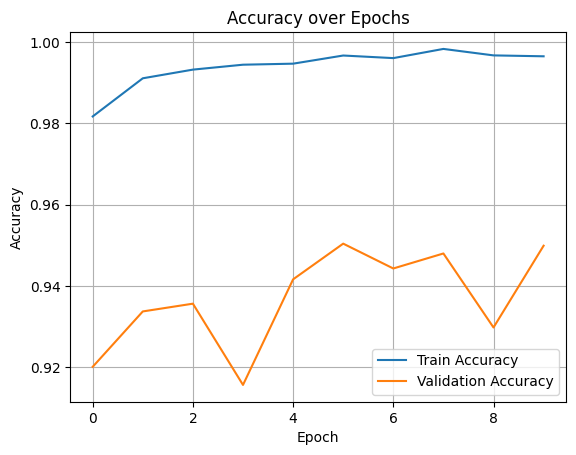

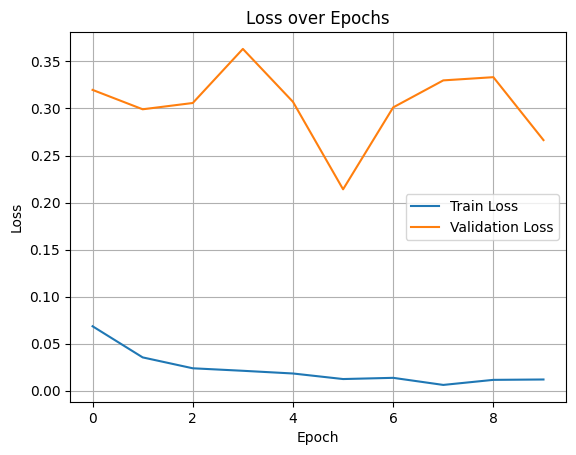

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

Final Training Accuracy: 99.66%
Final Validation Accuracy: 94.99%


In [ ]:
model.save('traffic_sign_cnn_model.keras')  # ✅ Modern format

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('traffic_sign_cnn_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

In [ ]:
# Path to your saved model
model_path = '/content/drive/MyDrive/traffic_sign_cnn_model.keras'  # or .h5 if saved in old format

# Load the trained model
model = load_model('/content/traffic_sign_cnn_model.keras')

# Path to your image for testing
test_image_path = '/content/drive/MyDrive/archive/Class_0/sample.jpg'  # Replace with your image path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
📸 File tested: 33.png
✅ Predicted class index: 27
🏷️ Predicted class label: 33


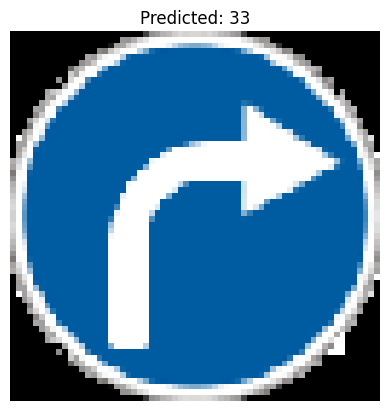

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# ✅ Step 1: Set image size and model path
img_height, img_width = 64, 64
model_path = '/content/traffic_sign_cnn_model.keras'  # updated model path

# ✅ Step 2: Load the trained model
model = load_model(model_path)

# ✅ Step 3: Define path to a test image in the Meta folder
# Use os.listdir to list actual files
meta_folder = '/content/drive/MyDrive/archive/Meta'
test_image_name = os.listdir(meta_folder)[4]  # pick the first image automatically
test_image_path = os.path.join(meta_folder, test_image_name)

# ✅ Step 4: Load and preprocess the image
img = image.load_img(test_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# ✅ Step 5: Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# ✅ Step 6: Get class label (optional - only if train_data is available)
# If train_data.class_indices is NOT available, skip this part or manually create a label map
try:
    label_map = {v: k for k, v in train_data.class_indices.items()}
    predicted_label = label_map[predicted_class]
except:
    predicted_label = f"Class_{predicted_class}"  # fallback if class_indices are not available

# ✅ Step 7: Show results
print(f"📸 File tested: {test_image_name}")
print(f"✅ Predicted class index: {predicted_class}")
print(f"🏷️ Predicted class label: {predicted_label}")

# ✅ Step 8: Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
# Loop through all images in the Meta folder
for test_image_name in os.listdir(meta_folder):
    test_image_path = os.path.join(meta_folder, test_image_name)

    try:
        img = image.load_img(test_image_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        try:
            label_map = {v: k for k, v in train_data.class_indices.items()}
            predicted_label = label_map[predicted_class]
        except:
            predicted_label = f"Class_{predicted_class}"

        print(f"{test_image_name} --> Predicted: {predicted_label}")

    except Exception as e:
        print(f"❌ Error processing {test_image_name}: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
26.png --> Predicted: 26
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
29.png --> Predicted: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
34.png --> Predicted: 34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2.png --> Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
33.png --> Predicted: 33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
21.png --> Predicted: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
28.png --> Predicted: 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
23.png --> Predicted: 26
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
0.png --> Predicted: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
9.png --> Predicted: 41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
7.png --> Predicted: 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
27.png --> Predicted: 27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
42.png --> Predicted: 41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
3.png --> Predicted: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4.png --> Predicted: 35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
18.png --> Predicted: 18
1

In [ ]:
import pandas as pd

results = []

for test_image_name in os.listdir(meta_folder):
    test_image_path = os.path.join(meta_folder, test_image_name)

    try:
        img = image.load_img(test_image_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        try:
            label_map = {v: k for k, v in train_data.class_indices.items()}
            predicted_label = label_map[predicted_class]
        except:
            predicted_label = f"Class_{predicted_class}"

        results.append({"Image": test_image_name, "Predicted Label": predicted_label})

    except Exception as e:
        results.append({"Image": test_image_name, "Predicted Label": f"Error: {e}"})

# Save to CSV
df = pd.DataFrame(results)
df.to_csv('/content/predictions.csv', index=False)
print("✅ Predictions saved to predictions.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

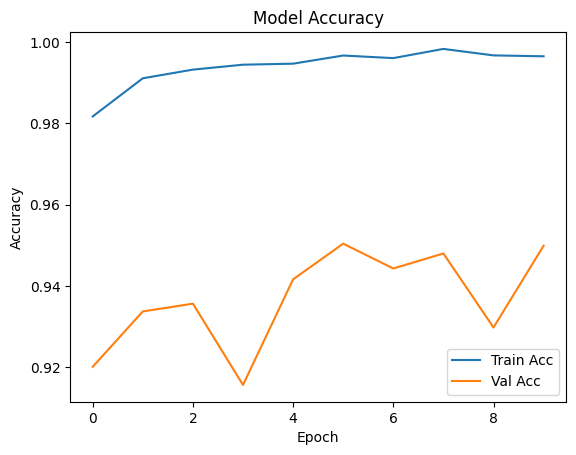

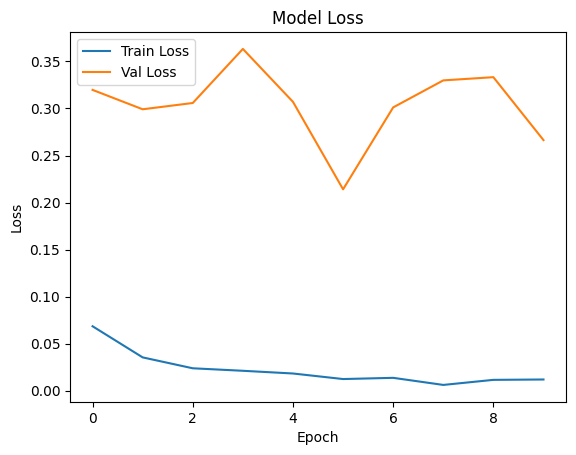

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: model accuracy and model loss in percentage

# Print final training and validation accuracy and loss in percentage
print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")
print(f"Final Training Loss: {history.history['loss'][-1] * 100:.2f}%")
print(f"Final Validation Loss: {history.history['val_loss'][-1] * 100:.2f}%")

Final Training Accuracy: 99.66%
Final Validation Accuracy: 94.99%
Final Training Loss: 1.18%
Final Validation Loss: 26.64%


In [ ]:
model.save('/content/drive/MyDrive/traffic_sign_model_final.keras')